
# <p style="text-align: center;">MIS382: Advanced Predictive Modeling</p>
# <p style="text-align: center;">Assignment 4</p>
## <p style="text-align: center;">Total points: 70</p>
## <p style="text-align: center;">Due: Tuesday, November 13th, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  **Please include the name and UTEID for both students on all submitted files (including this notebook).** In addition, please convert **your filename including your EID** (ex. ss324.jpynb or ss324_mj345.jpypb).

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Submitted by Apoorva Reddy  Adavalli and Jui Gupta 

# Question 1 - Reject Option (20 Points)


For the Loss matrix given below, compute  the range of P(C1|x) where (i) It is best to call "Class 1", and (ii) where it is best to take the reject option.

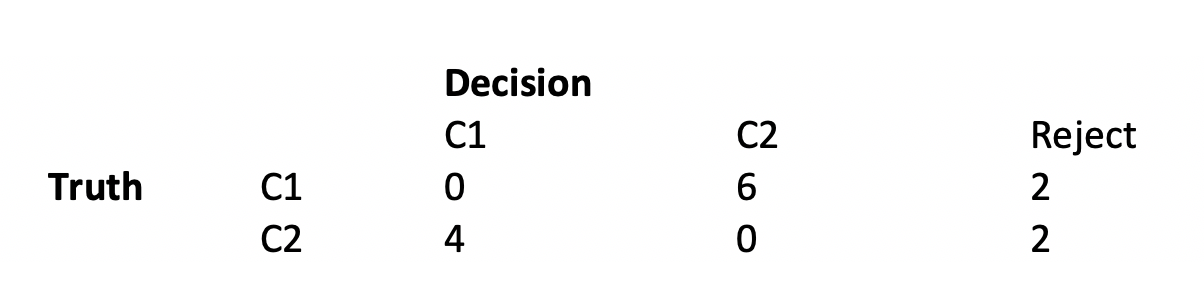

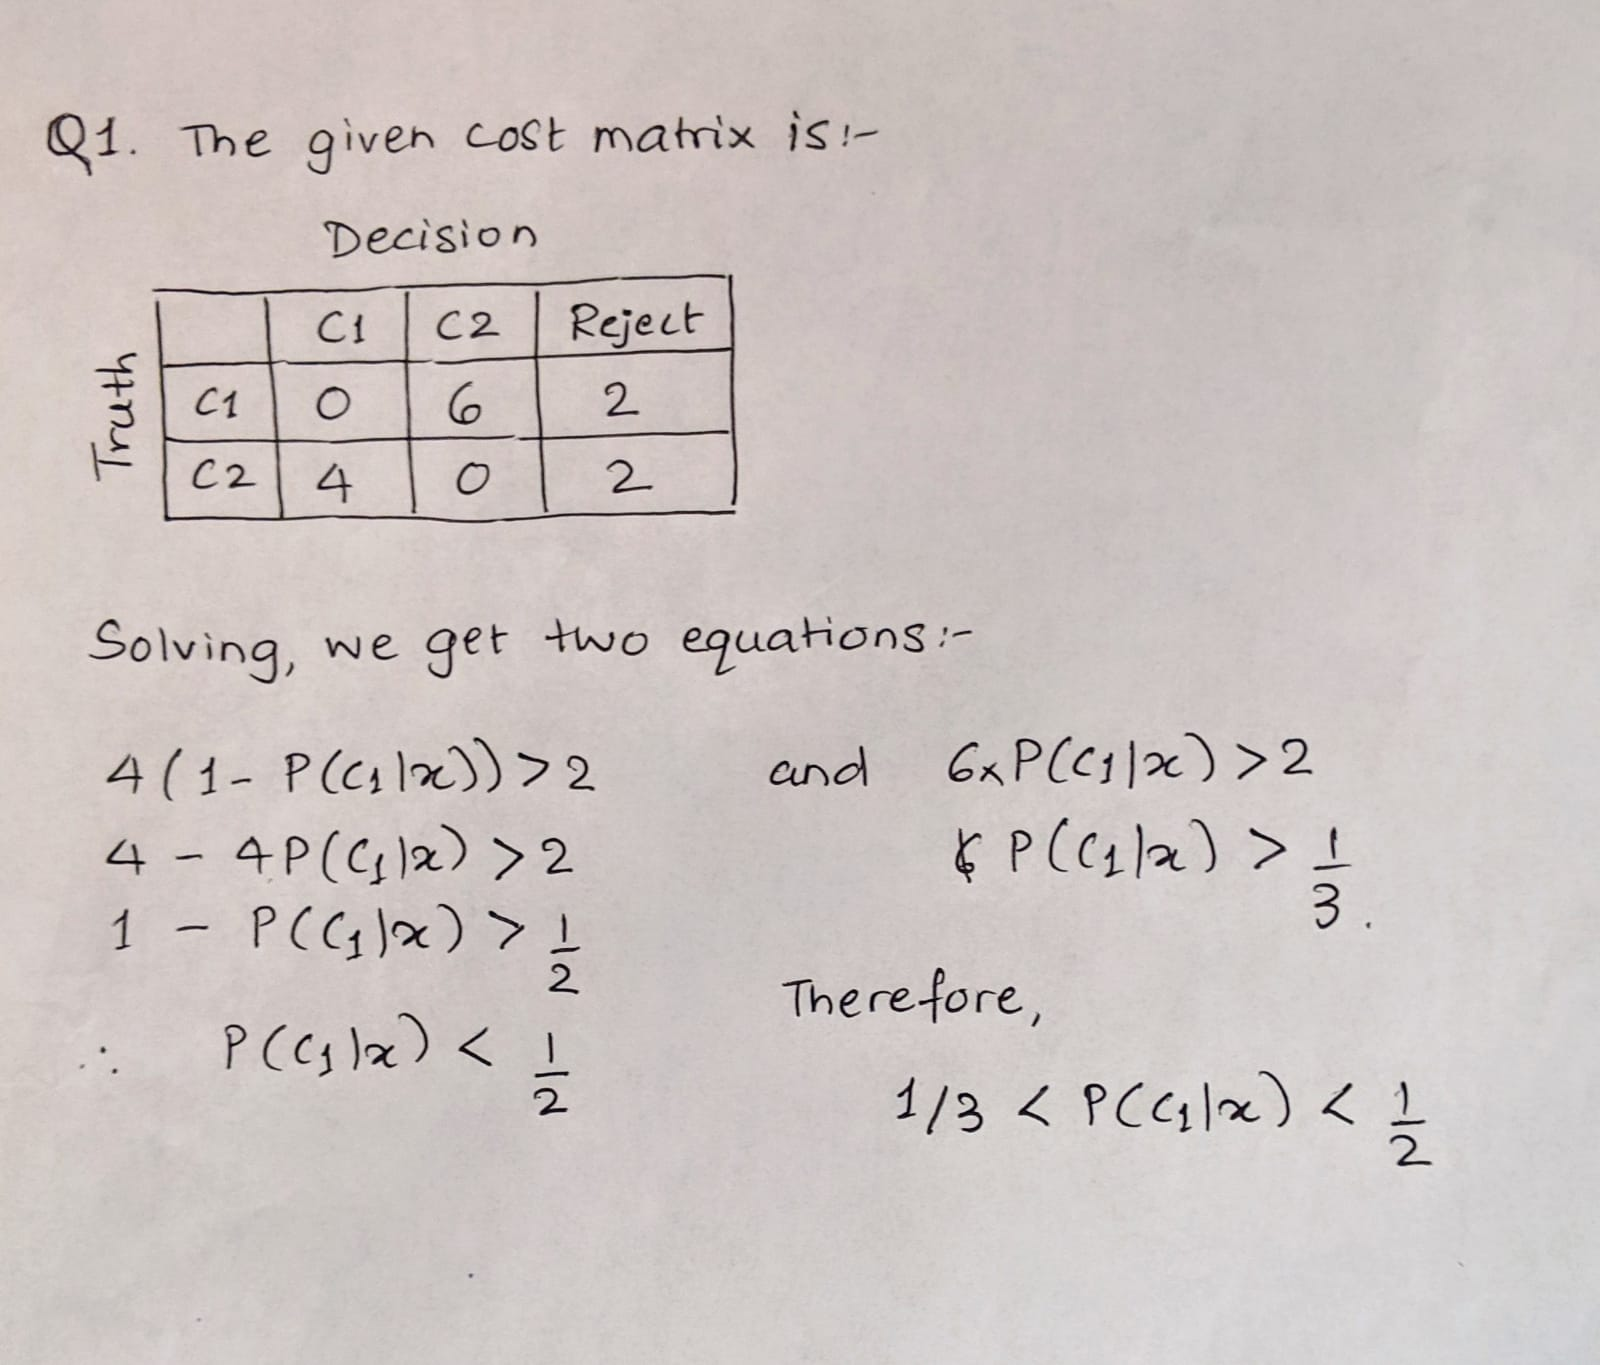

In [1]:
## Answer
from IPython.display import Image
Image(filename='costmatrix.jpeg')

(i) From the equation, it can be seen that the range of class C1 > 1/2 So we can safely say that anything that falls over 0.5 can be classified as Class1

Just as a precaution, let us validate that we have classified class1 correctly.Let us initially assume the value of P(c1|x) as 0.2. The error will then be (0.2*0 + 0.8*4) = 3.2 This is greater than reject value which is incorrect. On the other hand, let us assume P(c1|x) = 0.6 Now in this case, the error will be (0.6*0 + 0.4*4) = 1.6 This is within the reject value, hence classification as class c1 > 0.5 makes sense.

(ii) Again, after solving for interpretation of cost matrix, from the equation it can be seen that, for the region lying between 0.33 and 0.5 is the reject region according to the numbers represented in the cost matrix

# Question 2 - Concepts (15 pts)

1. (3+3+4 pts) Briefly describe what you understand by a Lift curve/chart? How is it similar to an ROC curve and in what way is it different? Provide an example where you might prefer using Lift (for a certain decile) over AUROC (AUC) as a point measure of the performance of your classifier. (Point measure means evaluation using a single numeric value.)


2. (5 pts) Explain what it means to calibrate a classifier. Give an example of an application where having a well calibrated model is important, and it is not enough to just estimate what the most likely class label is for a given data point.

## Answer

Lift chart, ROC curve and Calibration plot are graphical techniques useful for evaluating the qualiy of classification models. These techniques are used for visualizing, organizing, improving and selecting classifiers based on their performance.


1.

A lift curve/chart shows the same information as an ROC curve, but in a way that emphasises the richness of the ordering of data in the beginning.

Let us consider an example. Consider a preschool which sends out fliers to selected households with the goal to boost its summer admissions. They have a list of all households in a particular county where each household is described by a set of attributes. Each flier sent costs a few pennies, but it is well paid off if a customer enrolls. They want to minimize number of fliers sent while maximizing number of enrollments by sending out the flier only to those families that are most likely to enroll.
Let us assume a customer base of 1000 customers spread out over ten equally sized areas of the county, out of which 400 customers are most likely to enroll. Analytics of our consumer base shows that almost 90% of the likely 400 customers are located within three areas. So instead of sending out fliers to all 1000 people, we could only send out fliers to these three areas i.e. 30% of the population.

With this approach, we effectively captured 90% of the target customers yet only marketed in 30% of all the areas. So in short the improvement of performance of the new campaign is 90/30 i.e 3.
If we plot this on a curve, we get the lift curve.


ROC is similar to lift in that they both provide a means of comparison for classification models. Lift curve measures how much more likely we are to predict a positive class correctly with our model than if we were to randomly guess without a model. ROC represents the probability that the classifier will rank a randomly chosen postitive example higher than a randomly negative example. Basically, ROC is a measure of how well your classifier can separate the classes you are trying to predict. Depending on the problems we are trying to solve, we will be interested in one over the other.

Particularly, we will be interested in lift when the percentage of positive class is low. In problem situations where the response rate for a category is very low anyway (for example, a direct mail response rate), the lift curve
explains things with more detail than the ROC curve.

2.

Let us consider two kinds of classifiers - Binary classifiers and Probabilistic classifiers.
Binary classifiers simply make predictions about belonging to positive or negative class. Probabilistic classifiers assign each example a score or probability that should express the true probability that an example belongs to the positive class.
Calibration plot is a method that shows us how well the classifier is calibrated and allows us to calibrate it perfectly.
Even after perect calibration of a classifier, its ROC and lift chart are not affected and its classification ability remains unchanged.

Calibration plot is a graph with a parametric definition of -
x = true probability
y = predicted probability

Calibration is essential for model accuracy and robustness.
For example, let us consider the application where we are estimating traffic volumes on transits and roadways.
Once satisfactory estimates of the parameters of model have been obtained, the models must be checked to assure that they adequately perform the functions for which they are intended, that is, to accurately estimate traffic volumes on transit and roadways. Validating the models requires comparing traffic estimated by the model to observed traffic on the roadway and transit systems.

# Question 3 - MNIST Classification (20 pts)

In this problem, you will classify between digits 8 and 9 of the MNIST dataset using Logistic Regression, Naive Bayes, and MLP. The code below loads the dataset, splits it into training and testing sets, and extracts the images containing either 8 or 9. The modules you will need from scikit-learn are loaded for you.

1. Train Logistic Regression, (Gaussian) Naive Bayes, and MLP classifiers. Extract the probability of the class being 'Digit 8' or 'Digit 9' for every row.

2. (6 pts) Use this to plot the receiver operating characteristic (ROC) curve. (one figure for all 3 models, with a label for each line)

3. (6 pts) Report the area under the ROC curve (AUC) and the accuracy for each model.

4. (6 pts)  For each of the 3 models, show a scatterplot of the obtained posterior probability estimates  vs. ground truth label value, for the data points in the test set. 

5. (2 pts) What do you notice about the distribution of the Naive Bayes estimated posterior probability values compared to the estimates from the other two models? 

In [2]:
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata

In [3]:
mnist = fetch_mldata("MNIST original", data_home='dataset_original/dataset/')  # data downloaded in'./dataset/', change if necessary

C:\Users\judge\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\judge\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
print mnist.data.shape
print mnist.target.shape

(70000L, 784L)
(70000L,)


In [5]:
X= (mnist.data / 255.)
y = mnist.target

num_train = 60000
idxs_perm = np.random.permutation(X.shape[0])
idxs_train = idxs_perm[:num_train]
idxs_test = idxs_perm[num_train:]

In [6]:
X_train = X[idxs_train]
y_train = y[idxs_train]
X_test = X[idxs_test]
y_test = y[idxs_test]

In [7]:
digits = [8, 9]
idx = (y_train == digits[0]) + (y_train==digits[1])
X_train = X_train[idx]
y_train = y_train[idx]
y_train = (y_train-digits[0])

idx = (y_test == digits[0]) + (y_test==digits[1])
X_test = X_test[idx]
y_test = y_test[idx]
y_test = (y_test-digits[0])

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#0 is digit 8 and 1 is digit 9

((11873L, 784L), (11873L,), (1910L, 784L), (1910L,))


## Answer

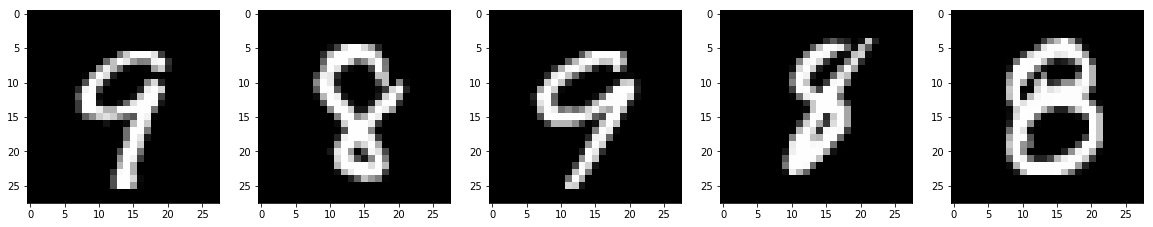

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], X_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

In [9]:
logistic_m= LogisticRegression()
logistic_m.fit(X_train, y_train)
logistic_pred=logistic_m.predict(X_test)
print 'accuracy ', logistic_m.score(X_test,y_test)
logistic_probabilities=logistic_m.predict_proba(X_test)[:,1]

C:\Users\judge\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy  0.981151832460733


In [10]:
NB=GaussianNB()
NB.fit(X_train, y_train)
NB_pred=NB.predict(X_test)
print 'accuracy ', NB.score(X_test,y_test)
NB_probabilities=NB.predict_proba(X_test)[:,1]

accuracy  0.8664921465968587


In [11]:
MLP=MLPClassifier()
MLP.fit(X_train, y_train)
MLP_pred=MLP.predict(X_test)
print 'accuracy ', MLP.score(X_test,y_test)
MLP_probabilities=MLP.predict_proba(X_test)[:,1]

accuracy  0.9921465968586387


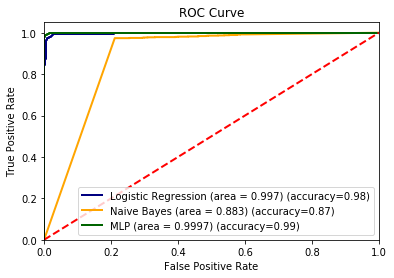

In [12]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, logistic_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)
lr_score=logistic_m.score(X_test,y_test)
nb_fpr, nb_tpr, _ = roc_curve(y_test, NB_probabilities)
nb_roc_auc = auc(nb_fpr, nb_tpr)
nb_score=NB.score(X_test,y_test)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, MLP_probabilities)
mlp_roc_auc = auc(mlp_fpr, mlp_tpr)
mlp_score=MLP.score(X_test,y_test)

plt.figure()
#plt.plot(fpr, tpr, color='darkorange',
#         lw=2, label='K-nearest Neighbours (area = %0.2f)' % roc_auc)
plt.plot(lr_fpr, lr_tpr, color='navy',
         lw=2, label='Logistic Regression (area = %0.3f) (accuracy=%0.2f)' %(lr_roc_auc,lr_score))
plt.plot(nb_fpr, nb_tpr, color='orange',
         lw=2, label='Naive Bayes (area = %0.3f) (accuracy=%0.2f)' %(nb_roc_auc,nb_score))
plt.plot(mlp_fpr, mlp_tpr, color='darkgreen',
         lw=2, label='MLP (area = %0.4f) (accuracy=%0.2f)' %(mlp_roc_auc,mlp_score))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [13]:
print 'Logistic Regression - AUC = %0.3f, accuracy =%0.2f ' %(lr_roc_auc,lr_score)
print 'Naive Bayes - AUC = %0.3f, accuracy =%0.2f ' %(nb_roc_auc,nb_score)
print 'MLP - AUC = %0.4f, accuracy =%0.4f' %(mlp_roc_auc,mlp_score)

Logistic Regression - AUC = 0.997, accuracy =0.98 
Naive Bayes - AUC = 0.883, accuracy =0.87 
MLP - AUC = 0.9997, accuracy =0.9921


Text(0.5,1,'Logistic regression')

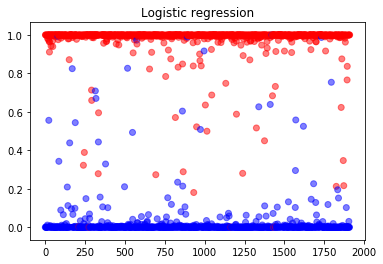

In [14]:
color=['red' if i==1 else 'blue' for i in y_test]
plt.scatter(range(len(y_test)), logistic_probabilities,color=color,alpha=0.5)
plt.title('Logistic regression')

Text(0.5,1,'Naive bayes')

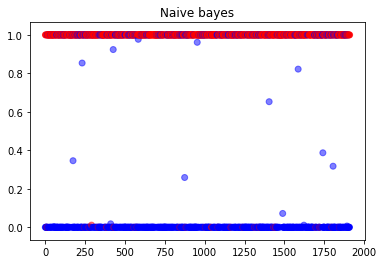

In [45]:
color=['red' if i==1 else 'blue' for i in y_test]
plt.scatter(range(len(y_test)), NB_probabilities,color=color,alpha=0.5)
plt.title('Naive bayes')

Text(0.5,1,'MLP regression')

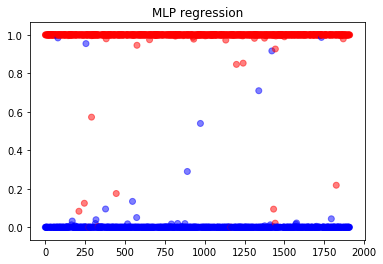

In [16]:
color=['red' if i==1 else 'blue' for i in y_test]
plt.scatter(range(len(y_test)), MLP_probabilities,color=color,alpha=0.5)
plt.title('MLP regression')

In [37]:
pd.Series(y_test).value_counts()

1.0    991
0.0    919
dtype: int64

In [38]:
pd.Series(NB_pred).value_counts()

1.0    1194
0.0     716
dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, NB_pred)
print(results)

[[690 229]
 [ 26 965]]


In [19]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, logistic_pred)
print(results)

[[900  19]
 [ 17 974]]


In [24]:
from sklearn.metrics import confusion_matrix
results = confusion_matrix(y_test, MLP_pred)
print(results)

[[913   6]
 [  9 982]]


From the above graphs, we can see that Naive Bayes wrongly classifies many 8 values as 9 when compared to other models, thus it's accuracy is low. The reasons are Naive Bayes doesn't perform well when there are repeated attributes or when attributes are not equally important, which is the case in the MNIST dataset. In this dataset, all the pixel values are not important and cannot be assumed as independent values, but Naive Bayes because of independence assumption doesn't take into account this factor. Hence it's posterior probabilities also misclassify strongly i.e with higher probability, thus directly placing in the other class whereas the other models (though) misclassify the points (but) not so strongly i.e. with probability in between O and 1. That's why we find more points in between 0 and 1 probaility in the other two cases.

# Question 4 - Bayesian Belief Network (15 pts)

An example of Bayesian network for a futuristic medical diagnosis is shown below. This network might be used to diagnose whether a patient is suffering from a mere common cold (C) and/or the more dangerous Martian Death Flu (F), based on the patients' symptoms -- whether or not the patient has a runny nose (R), whether or not the patient has a headache (H), and whether or not the patient occasionally spontaneously bursts into flames (S) -- as well as relevant background information, namely whether or not he or she has previously visited Mars (V).    
All the six variables are binary with 1 representing "true" and 0 "false".

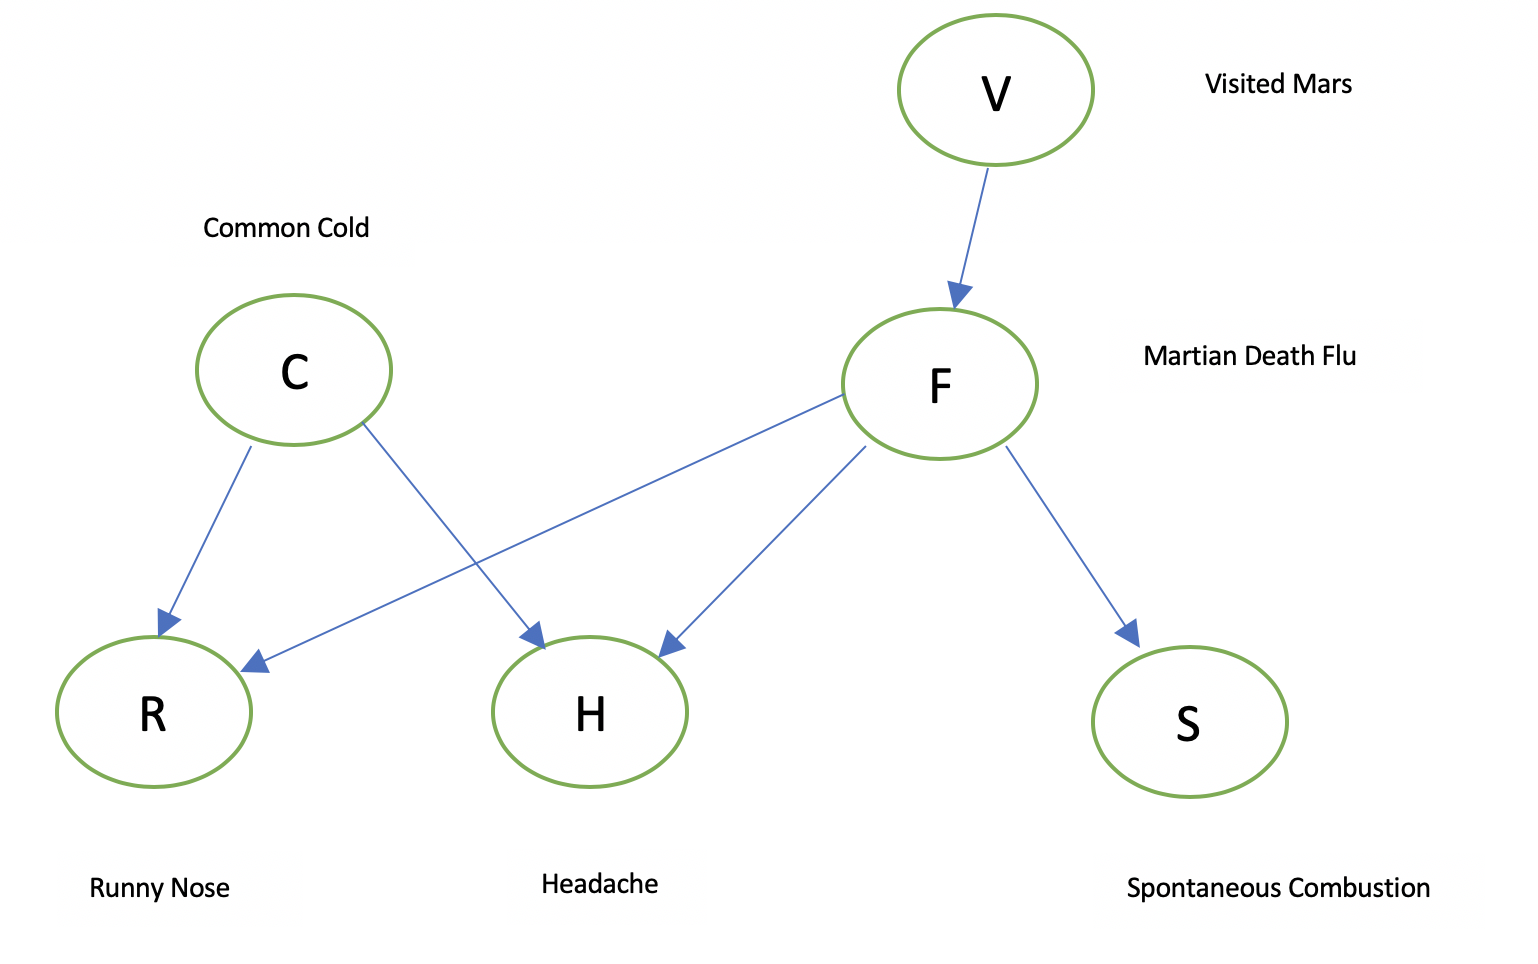

In [18]:
from IPython.display import Image
Image(filename='BBN4.png',retina=True)

All nodes are binary and can take 0/1 values

The probabilities are given below:

P(V = 1) = 0.0001   
P(C = 1) = 0.05  


P(F = 1 | V = 0) = 0.0  
P(F = 1 | V = 1) = 0.999  

P(R = 1 | C = 0, F = 0) = 0.05  
P(R = 1 | C = 0, F = 1) = 0.50  
P(R = 1 | C = 1, F = 0) = 0.90  
P(R = 1 | C = 1, F = 1) = 0.98

P(H = 1 | C = 0, F = 0) = 0.07  
P(H = 1 | C = 0, F = 1) = 0.98  
P(H = 1 | C = 1, F = 0) = 0.60  
P(H = 1 | C = 1, F = 1) = 0.99

P(S = 1 | F = 0) = 0.0  
P(S = 1 | F = 1) = 0.8 

For the given Bayesian network, Compute the following probabilities : 


(a) (5 pts) Find the probability that the person has headache 

(b) (5 pts) Given that person visited mars, what is the probability that he has runny nose

(c) (5 pts) Given that person visited mars and has a runny nose, what is the probability that the person has common cold and not martian death flu.
